In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers, datasets
import matplotlib as plt
import matplotlib.pyplot as plt



d:\VS\MiniConda\envs\Testing\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\VS\MiniConda\envs\Testing\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\VS\MiniConda\envs\Testing\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility vio

In [2]:
(X_train , y_train), (X_test, y_test)=datasets.mnist.load_data()

## Data PreProcessiong 

In [3]:
# 3. Normalize & Reshape
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

✅ Compare before vs after normalization

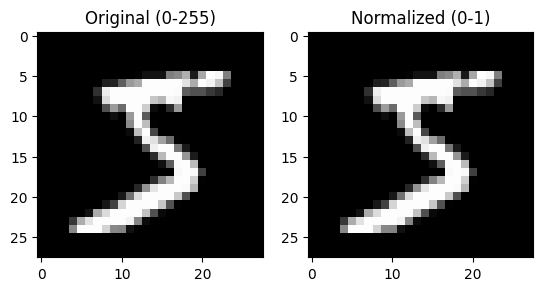

In [4]:
plt.subplot(1,2,1)
plt.imshow((X_train[0]*255).reshape(28,28), cmap="gray")
plt.title("Original (0-255)")

plt.subplot(1,2,2)
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title("Normalized (0-1)")
plt.show()


In [5]:
X_train.shape


(60000, 28, 28, 1)

In [6]:
X_test.shape

(10000, 28, 28, 1)

In [7]:
y_train.shape

(60000,)

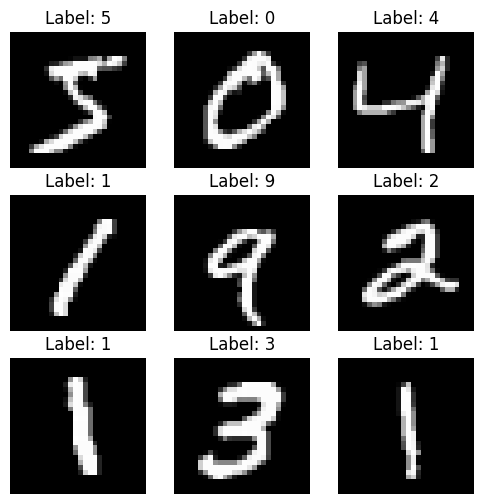

In [8]:
import matplotlib.pyplot as plt

# Show first 9 images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [9]:
# 4. Build Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\VS\MiniConda\envs\Testing\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 5. Compile 
model.compile (optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [11]:
# 6. Train 
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9512 - loss: 0.1581 - val_accuracy: 0.9755 - val_loss: 0.0798
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9840 - loss: 0.0517 - val_accuracy: 0.9873 - val_loss: 0.0430
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9885 - val_loss: 0.0405
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9917 - loss: 0.0265 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9933 - loss: 0.0196 - val_accuracy: 0.9882 - val_loss: 0.0468


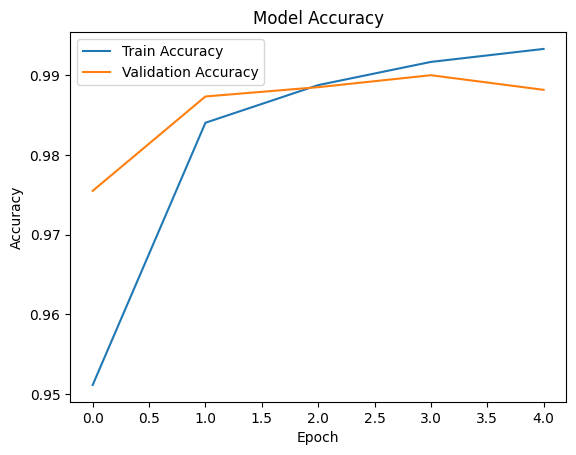

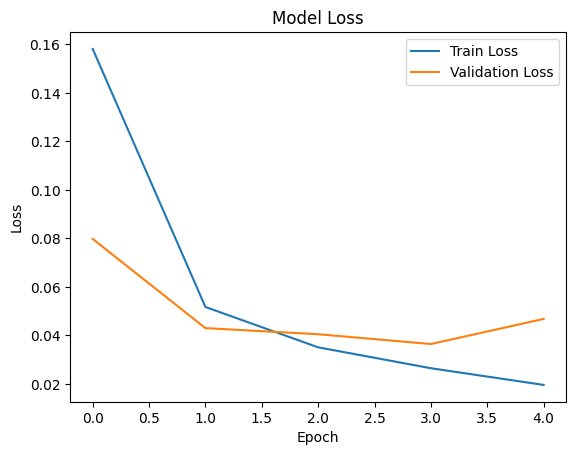

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [13]:
# 7. Evaluate
test_loss, test_acc=model.evaluate(X_test, y_test, verbose=2)
print("✅ Test accuracy:", test_acc)



313/313 - 1s - 5ms/step - accuracy: 0.9897 - loss: 0.0371
✅ Test accuracy: 0.9897000193595886


In [14]:
import matplotlib
print(matplotlib.__file__)
import matplotlib.pyplot as plt


d:\VS\MiniConda\envs\Testing\Lib\site-packages\matplotlib\__init__.py


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


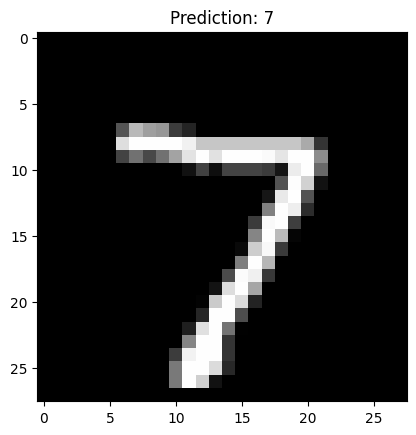

In [15]:
# 8. Predict & Plot
plt.imshow(X_test[0].reshape(28,28), cmap="gray")
plt.title("Prediction: " + str(model.predict(X_test[:1]).argmax()))
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


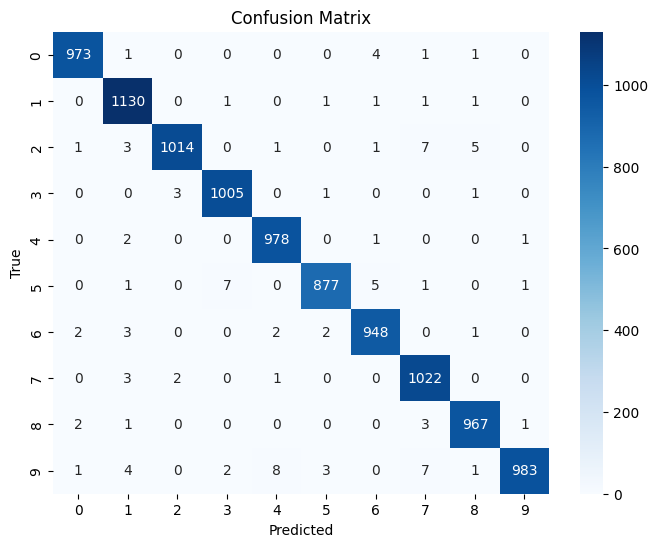

In [16]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If your labels are integers
y_true = y_test  

# If your labels are one-hot encoded, then use:
# y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
